In [1]:
# import the required packages
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
%matplotlib inline

In [2]:
# import the pacakges

import math
import scipy.stats as stats
from scipy.stats import percentileofscore

from sklearn.model_selection import train_test_split
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import ArbitraryOutlierCapper
from feature_engine.transformation import BoxCoxTransformer
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

from sklearn.preprocessing import PolynomialFeatures

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer

# do pipelines, using sklearn method
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to impute missing data with feature-engine
from feature_engine.imputation import MeanMedianImputer,ArbitraryNumberImputer,RandomSampleImputer

from feature_engine.discretisation import EqualFrequencyDiscretiser
from sklearn.preprocessing import StandardScaler

from feature_engine.encoding import RareLabelEncoder
from sklearn.decomposition import PCA

## 1. HR Analytics

### 1.1 Load and Sample the data
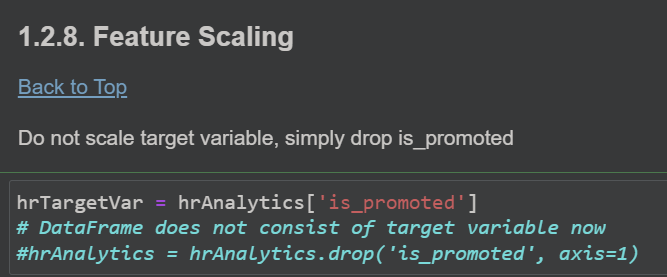

In [3]:
hrAnalytics = pd.read_csv("hr_analytics_final.csv", index_col=0)  # Sets the first column as the index

In [4]:
hrAnalytics

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,2,1.0,3.0,2.0,0,1,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,16.0,3.0,1.0,0,0,12.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,1,13.0,4.0,6.0,0,0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0
3,1,1.0,4.0,0.0,1,0,18.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1,12.0,3.0,1.0,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9331,1,8.0,3.0,1.0,1,0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
9332,1,15.0,5.0,5.0,1,0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
9333,2,2.0,4.0,1.0,1,0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
9334,1,4.0,3.0,0.0,0,0,9.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [5]:
hrAnalytics.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,...,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,1.228578,7.634533,3.644494,3.441410,0.505677,0.066945,9.244002,0.047558,0.037168,0.016710,...,0.009319,0.092973,0.010818,0.003642,0.015531,0.291774,0.692695,0.026243,0.415917,0.500000
std,0.559690,5.102957,1.175499,2.926047,0.499995,0.249940,5.728589,0.212840,0.189183,0.128188,...,0.096088,0.290411,0.103453,0.060241,0.123660,0.454603,0.461402,0.159864,0.492906,0.500027
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,4.000000,3.000000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000
75%,1.000000,12.000000,5.000000,5.000000,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,8.000000,16.000000,5.000000,9.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
hrAnalytics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 0 to 9335
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               9336 non-null   int64  
 1   age                           9336 non-null   float64
 2   previous_year_rating          9336 non-null   float64
 3   length_of_service             9336 non-null   float64
 4   KPIs_met >80%                 9336 non-null   int64  
 5   awards_won?                   9336 non-null   int64  
 6   avg_training_score            9336 non-null   float64
 7   department_Finance            9336 non-null   float64
 8   department_HR                 9336 non-null   float64
 9   department_Legal              9336 non-null   float64
 10  department_Operations         9336 non-null   float64
 11  department_Procurement        9336 non-null   float64
 12  department_R&D                9336 non-null   float64
 13  dep

In [7]:
# Set the "Survived" as target/model output and the rest features as model inputs
y_data = hrAnalytics['is_promoted']
X_data = hrAnalytics.drop(['is_promoted'], axis=1)

In [8]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2)

### Understanding Information Gain (IG) of Feature and Target

Using Scikit learn's nutual information classifier module, `mutual_info_classif`, it calculates the mutual information between each feature, and the target variable. It measures the amount of information obtained about one random variable, thorugh observing another variable. Hence, in the context of feature selection, it can measure the dependence between feature and target.

This is especually useful for decision trees, since it uses things like information gain to determine splitting of features.

In [24]:
from sklearn.feature_selection import mutual_info_classif

X = hrAnalytics.drop('is_promoted', axis=1)
y = hrAnalytics['is_promoted']

mutual_info = mutual_info_classif(X, y)

To interpret the features, we see the scale of 0 to 1. 0 indicates no mutual information (irrelevant), and 1 indicates the perfect dependence. Hence, the closer to 1, the more relevance it holds between feature and target.

In [26]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual_Info_Score': mutual_info})

# Print the feature importance DataFrame
print(feature_importance_df)

# Define thresholds for relevance
highly_relevant_threshold = 0.05
moderately_relevant_threshold = 0.02

# Categorize features based on thresholds
highly_relevant_features = feature_importance_df[feature_importance_df['Mutual_Info_Score'] >= highly_relevant_threshold]['Feature']
moderately_relevant_features = feature_importance_df[(feature_importance_df['Mutual_Info_Score'] >= moderately_relevant_threshold) &
                                                    (feature_importance_df['Mutual_Info_Score'] < highly_relevant_threshold)]['Feature']
not_relevant_features = feature_importance_df[feature_importance_df['Mutual_Info_Score'] < moderately_relevant_threshold]['Feature']

# Print the categorized features
print("Highly Relevant Features:", highly_relevant_features.tolist())
print("Moderately Relevant Features:", moderately_relevant_features.tolist())
print("Not Relevant Features:", not_relevant_features.tolist())

                         Feature  Mutual_Info_Score
0                no_of_trainings           0.003198
1                            age           0.004642
2           previous_year_rating           0.041418
3              length_of_service           0.000000
4                  KPIs_met >80%           0.071892
5                    awards_won?           0.031177
6             avg_training_score           0.062892
7             department_Finance           0.000000
8                  department_HR           0.002384
9               department_Legal           0.000000
10         department_Operations           0.000000
11        department_Procurement           0.011399
12                department_R&D           0.000000
13  department_Sales & Marketing           0.000000
14         department_Technology           0.009424
15              region_region_10           0.000000
16              region_region_11           0.000000
17              region_region_12           0.005274
18          

We analyse that there is a threshold for the features to be relevant to the target variable. Features with relatively higher scores, which is more than 0.05, are:
- kpis met
- avg training score
- previous year rating (almost)
- awards won (almost)

Hence these are key factors that influence promotion

We can keep the more relevant ones (we now have only 4 columns)

In [27]:
feature_columns = ['previous_year_rating', 
                   'KPIs_met >80%', 
                   'awards_won?', 
                   'avg_training_score']

# Filter the DataFrame to keep only the selected features
X_train = X_train[feature_columns]
X_test = X_test[feature_columns]

In [34]:
X_train.head()

,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
6274,4.0,0,0,16.0
7665,5.0,1,0,3.0
202,5.0,1,0,3.0
2776,3.0,1,0,17.0
7175,5.0,1,0,8.0


### 1.2 Build the Model(s)

In [9]:
# Imports needed for this Practical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [10]:
# Create Decision Tree Model
decision_tree = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

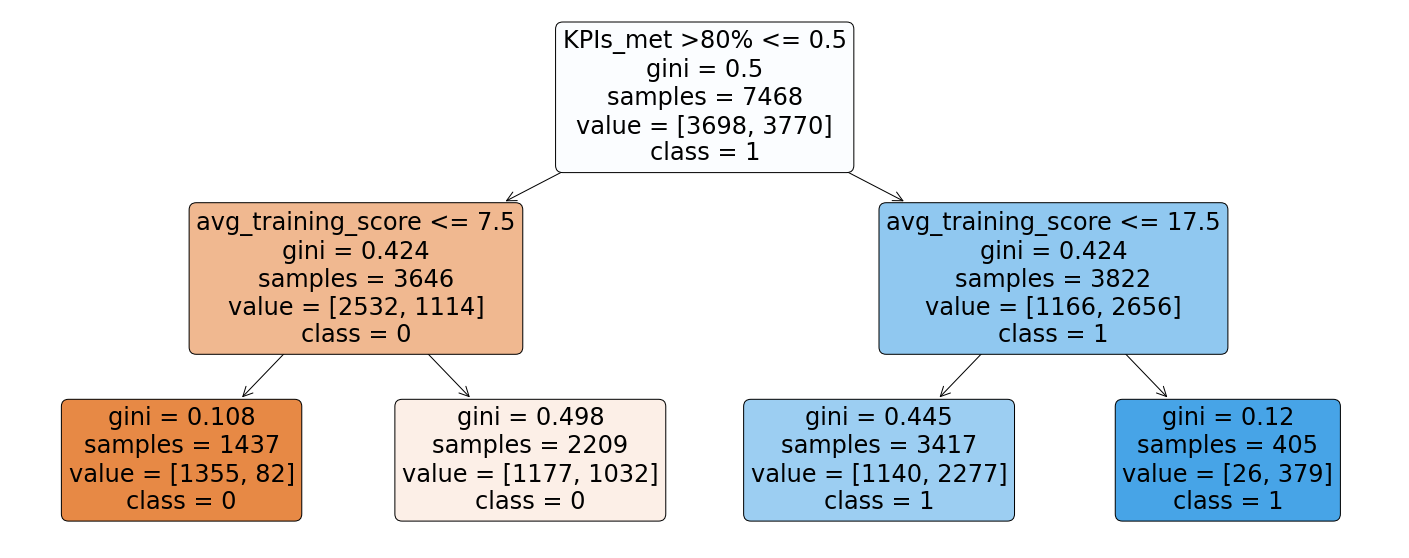

In [11]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(hrAnalytics.drop(['is_promoted'], axis=1)),
                class_names = ['0','1'],
                rounded = True,
                filled= True)
plt.savefig('tree1.png',format='png')
plt.show()              

In [12]:
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)

the training accuracy is:  0.6946973754686663


In [13]:
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the testing accuracy is:  0.686830835117773


In [14]:
from sklearn.model_selection import cross_val_score, cross_validate

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(decision_tree, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.69175147 0.69487214 0.69500602 0.6912572  0.69272995]
test_score:  [0.69860814 0.68612748 0.68559186 0.70058918 0.69469738]


### Decision Tree with only Relevant features

In [37]:
# Create Decision Tree Model
decision_tree1_2 = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree1_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

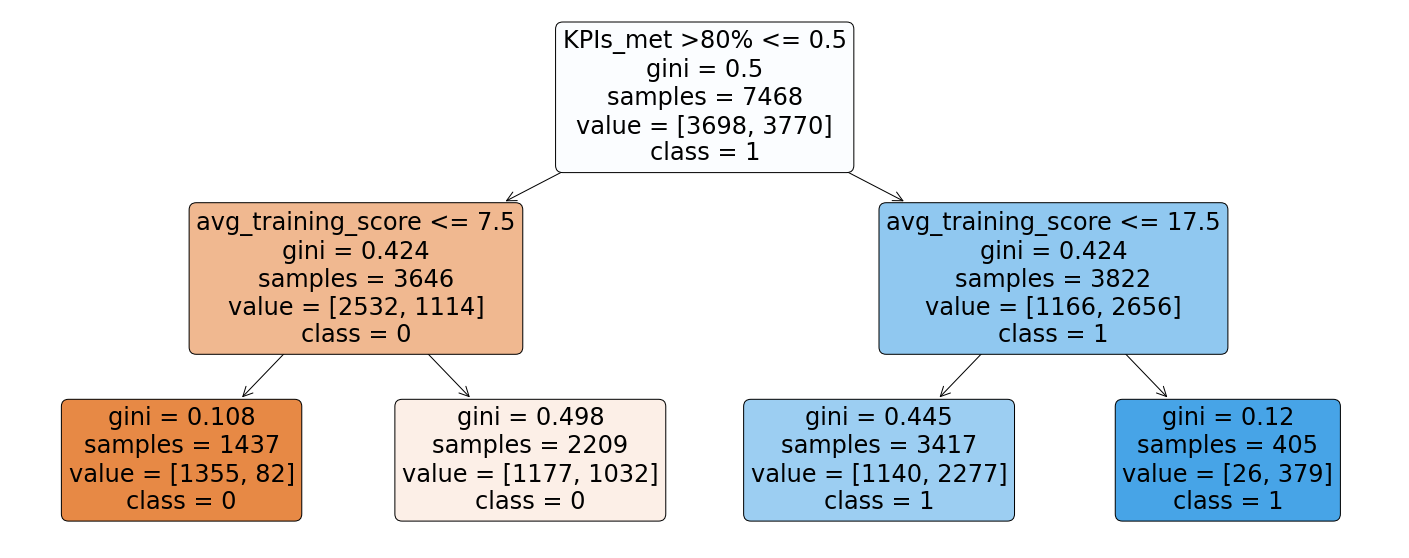

In [38]:
plt.figure(figsize=(25, 10))
tree.plot_tree(decision_tree1_2,
               feature_names=feature_columns,
               class_names=['0', '1'],
               rounded=True,
               filled=True)
plt.savefig('tree1.png', format='png')
plt.show()


In [42]:
#training acc
train_acc = decision_tree1_2.score(X_train, y_train)
print('the training accuracy is: ', train_acc)

#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.6946973754686663
the testing accuracy is:  0.686830835117773


### 1.3 Evaluate and Improve the Model(s)

In [15]:
# Use GridSearch to find the best combination of model hyperparameters

dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) # 

print(gs.best_score_)
print(gs.best_params_)

0.801017833622246
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [16]:
# Create Decision Tree using the best hyperparameters
decision_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth = 3, min_samples_leaf = 1, min_samples_split =2, random_state=1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

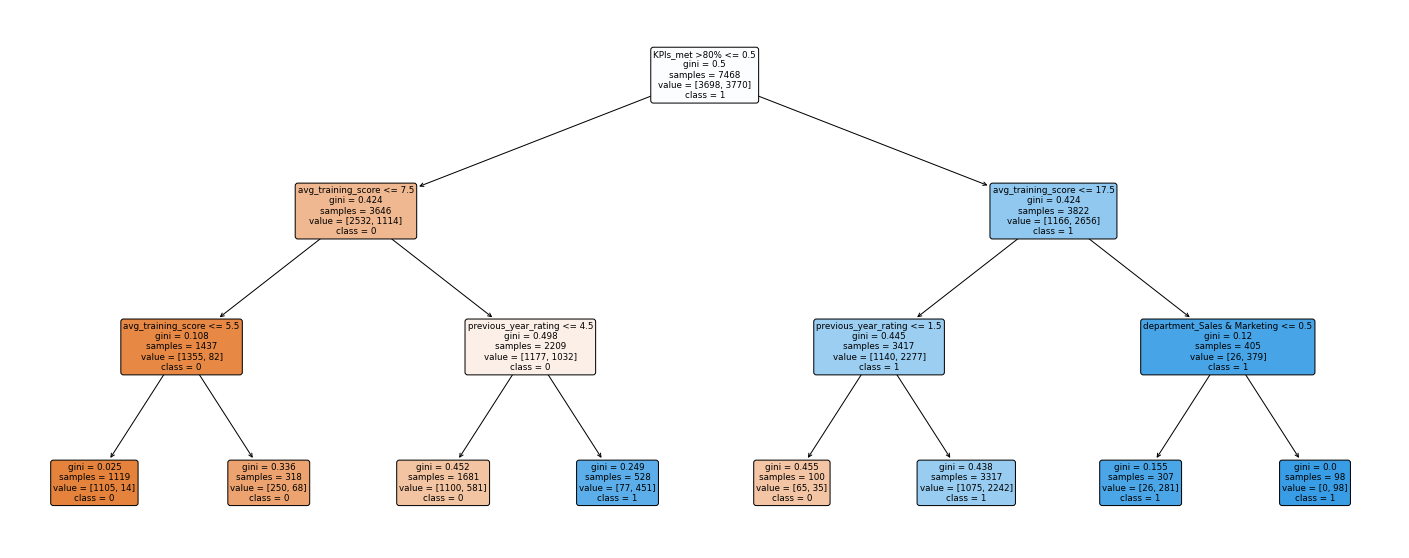

In [17]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(hrAnalytics.drop(['is_promoted'], axis=1)),
                class_names = ['0', '1'],
                rounded = True,
                filled= True)
plt.savefig('tree2.png',format='png')
plt.show() 

In [18]:
#Evaluate the Model
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)

the training accuracy is:  0.7487948580610605


In [19]:
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the testing accuracy is:  0.7408993576017131


### Using filtered data

### Using Support Vector Machine (SVM)

In [20]:
def plot_classifier(X, y, classifier, lims=None, ax=None, plot_title=None):
    """
    Visualize the decision boundary of a classifier.

    Parameters:
    - X: Feature matrix (pandas DataFrame or numpy array)
    - y: Target vector (numpy array)
    - classifier: Classifier object with a 'predict' method
    - lims: Limits for the plot (optional, tuple)
    - ax: Matplotlib AxesSubplot object (optional)
    - plot_title: Title for the plot (optional, str)
    """
    if ax is None:
        _, ax = plt.subplots()

    # Convert pandas DataFrame to numpy array if necessary
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Plot the decision boundary
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot the data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k", marker="o")
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")

    # Add legend and labels
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    if lims is not None:
        ax.set_xlim(lims[0], lims[1])
        ax.set_ylim(lims[2], lims[3])

    if plot_title:
        ax.set_title(plot_title)

    return ax


In [21]:
# Train a linear SVM
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
X_train.columns

# # Assuming X_train is a pandas DataFrame
# plot_classifier(X_train, y_train, svm, lims=(11, 15, 0, 6))

# plt.show()

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_region_5', 'region_r

In [22]:
import itertools

# Assuming X_train is your DataFrame and y_train is your target variable

# Selecting the features for visualization
selected_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
                      'KPIs_met >80%', 'awards_won?', 'avg_training_score',
                      'department_Finance', 'department_HR', 'department_Legal',
                      'department_Operations', 'department_Procurement', 'department_R&D',
                      'department_Sales & Marketing', 'department_Technology',
                      'region_region_10', 'region_region_11', 'region_region_12',
                      'region_region_13', 'region_region_14', 'region_region_15',
                      'region_region_16', 'region_region_17', 'region_region_18',
                      'region_region_19', 'region_region_2', 'region_region_20',
                      'region_region_21', 'region_region_22', 'region_region_23',
                      'region_region_24', 'region_region_25', 'region_region_26',
                      'region_region_27', 'region_region_28', 'region_region_29',
                      'region_region_3', 'region_region_30', 'region_region_31',
                      'region_region_32', 'region_region_33', 'region_region_34',
                      'region_region_4', 'region_region_5', 'region_region_6',
                      'region_region_7', 'region_region_8', 'region_region_9',
                      'education_Below Secondary', "education_Master's & above", 'gender_m',
                      'recruitment_channel_referred', 'recruitment_channel_sourcing']

# Get all possible combinations of two features
feature_combinations = list(itertools.combinations(selected_features, 2))

# Assuming svm is your SVM model
svm = SVC(kernel='linear')


In [23]:
# Make a new data set keeping only the support vectors
print("Number of original examples", len(X_train))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_, :]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

Number of original examples 7468


AttributeError: 'SVC' object has no attribute 'support_'

## 2. Airbnb

### 2.1 Load and Sample the data

### 2.2 Build the Model(s)

### 2.3 Evaluate and Improve the Model(s)

### Sources:
DataCamp on Linear Classifiers in Python
https://campus.datacamp.com/courses/linear-classifiers-in-python/support-vector-machines?ex=3